In [74]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READ CSV FILE
data = pd.read_csv('Documents/tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


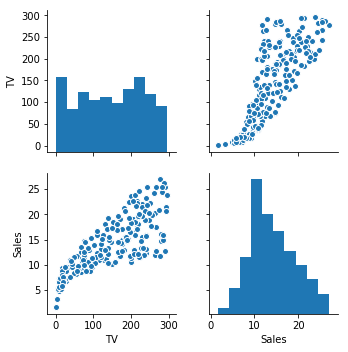

In [3]:
#DATA VISIALIZATION
sns.pairplot(data)

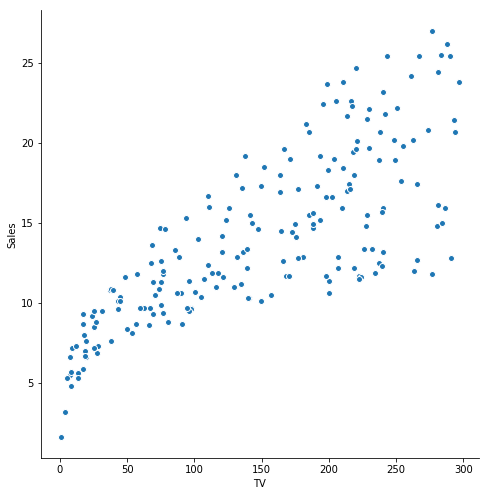

In [11]:
#SCATTER PLOT
sns.pairplot(data, kind='scatter',x_vars=['TV'],y_vars='Sales', size=7)

In [19]:
X = data['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [20]:
y = data['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [22]:
#LETS SPILIT TRAIN TEST FROM SKLEARN LIBRARY
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134,)
(66,)
(134,)
(66,)


In [38]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 1)
(66, 1)
(134,)
(66,)


In [27]:
#BUILD MODEL
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [42]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr.coef_

array([0.04822451])

In [44]:
lr.intercept_

7.066582521696441

In [46]:
y_pred = lr.predict(X_test)

Text(0,0.5,'Sales')

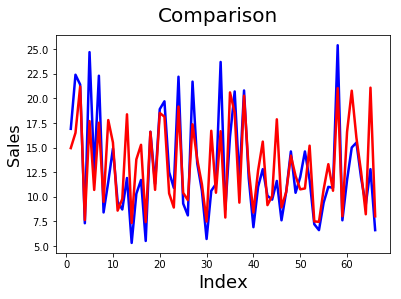

In [73]:
#COMPARISON BETWEEN Y_TEST AND Y_PREDICT
c = [i for i in range(1,67,1)] #generating index
fig = plt.figure()
plt.plot(c,y_test,color="blue", linewidth=2.5,linestyle="-")
plt.plot(c,y_pred,color="red", linewidth=2.5,linestyle="-")
fig.suptitle('Comparison',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=16)




Text(0,0.5,'Y_test - y_pred')

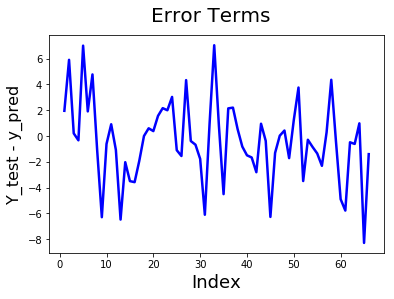

In [67]:
#ERROR
c = [i for i in range(1,67,1)] #generating index
fig = plt.figure()
plt.plot(c,y_test-y_pred,color="blue", linewidth=2.5,linestyle="-")
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Y_test - y_pred',fontsize=16)

In [68]:
#EVALUATE MODEL
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
mse = mean_squared_error(y_test,y_pred)

In [70]:
mse

9.712207417121473

In [71]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.6236886078089201

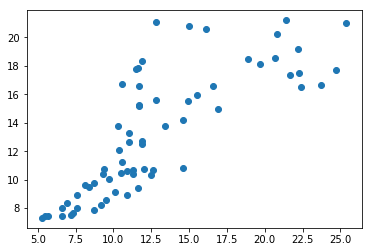

In [72]:
plt.scatter(y_test,y_pred)